# Ridge Regularization(Part-1) => 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
from sklearn.datasets import load_diabetes

data = load_diabetes()


In [9]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [11]:
X = data.data
y = data.target

In [45]:
print(X)

print(y)
print(y.shape)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 45)

In [57]:
y_test

array([155., 168., 115., 233., 190., 202.,  59., 101., 118., 244., 252.,
       148., 232.,  72., 107.,  71., 191.,  65., 245.,  85., 185.,  84.,
        78., 268., 248., 178., 196., 248., 144.,  83., 275.,  39., 113.,
        64., 232., 200., 200., 122., 163., 180., 135., 164., 156., 126.,
        68., 306.,  83.,  45.,  91.,  25., 270., 178., 108.,  86., 160.,
       196., 248., 139., 155., 150.,  74.,  89., 216.,  65., 242., 136.,
       185.,  91., 246.,  68., 101., 164., 113., 131., 215., 246., 265.,
       220., 107., 131.,  94., 116.,  63., 217., 302.,  72., 252., 111.,
        72.])

# Applying Simple Linear Regression =>

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
lr.fit(X_train , y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
y_pred = lr.predict(X_test)
y_pred

array([226.51848598, 157.46329293,  89.86172648, 207.92043638,
       175.27464325, 146.48196423, 131.11782081,  97.37923306,
       102.94499199, 181.69238112, 237.97531281, 134.74726724,
       189.44205531,  59.92873145, 179.98730177, 117.78561801,
       120.30969646, 126.66229732, 165.19425279, 147.78162151,
       145.4387221 , 124.41329425,  51.96058948, 227.75415791,
       218.10133602, 129.82865712, 160.13538356, 201.17200936,
       184.84143661,  68.90970369, 237.00685674,  58.17158783,
       154.39979192, 119.15941043, 234.0319742 , 172.80143208,
       139.94775146, 169.99263492, 214.59145267, 220.47784209,
       128.98250674, 186.20992149, 162.87053192, 179.77640803,
       107.76869146, 249.52929292, 140.92355113,  32.74846723,
       177.96181001, 145.76575416, 291.96774118, 125.71074727,
       107.27012754, 156.10001536, 115.93096259, 160.35263722,
       229.48001183, 173.38808746, 159.87971544, 123.05044568,
        88.54923021, 122.87202843, 169.12811086, 101.97

In [63]:
from sklearn.metrics import r2_score , mean_squared_error

print("R2 score: ", r2_score(y_test , y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test , y_pred)))

R2 score:  0.5188113124539249
RMSE:  48.72713760953252


# Applying Ridge Regularization =>

In [71]:
from sklearn.linear_model import Ridge

R = Ridge(alpha = 0.0001)

In [73]:
R.fit(X_train , y_train)

,alpha,0.0001
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [77]:
y_pred1 = R.predict(X_test)
y_pred1

array([226.48500746, 157.37002705,  89.85527246, 207.82093744,
       175.2396515 , 146.40814563, 131.1039    ,  97.31966166,
       102.92089276, 181.66241548, 238.01422527, 134.66278962,
       189.42760028,  59.94051208, 179.91268305, 117.75422356,
       120.35276363, 126.64959105, 165.12891835, 147.75850494,
       145.32945577, 124.37682108,  52.17147328, 227.75391379,
       218.45969252, 129.75909256, 160.26682871, 201.19467665,
       184.71555103,  68.9845619 , 236.94630225,  58.26201135,
       154.49141707, 119.17470898, 233.95785942, 172.90019385,
       139.89728382, 169.97195312, 214.5625562 , 220.44720233,
       128.97262779, 186.18983795, 162.80708259, 179.69281077,
       107.87266239, 249.54597038, 140.83556741,  32.87242302,
       177.88770166, 145.73513482, 291.94463828, 125.74105214,
       107.2820458 , 156.03199737, 115.90247833, 160.30429895,
       229.37000106, 173.44328781, 159.86529588, 122.98049214,
        88.57807531, 122.87739877, 169.15246697, 101.92

In [81]:
print("R2 score: ", r2_score(y_test , y_pred1))
print("RMSE: ", np.sqrt(mean_squared_error(y_test , y_pred1)))

R2 score:  0.518973263588496
RMSE:  48.71893700181951


# Here we generated a non-linear dataset =>

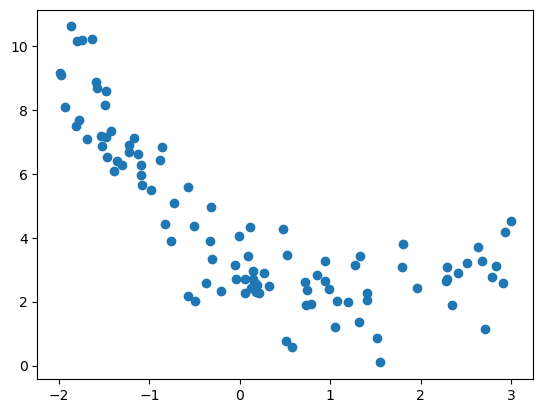

In [84]:
m = 100

x1 = 5 * np.random.rand(m ,1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m , 1)

plt.scatter(x1 , x2)
plt.show()

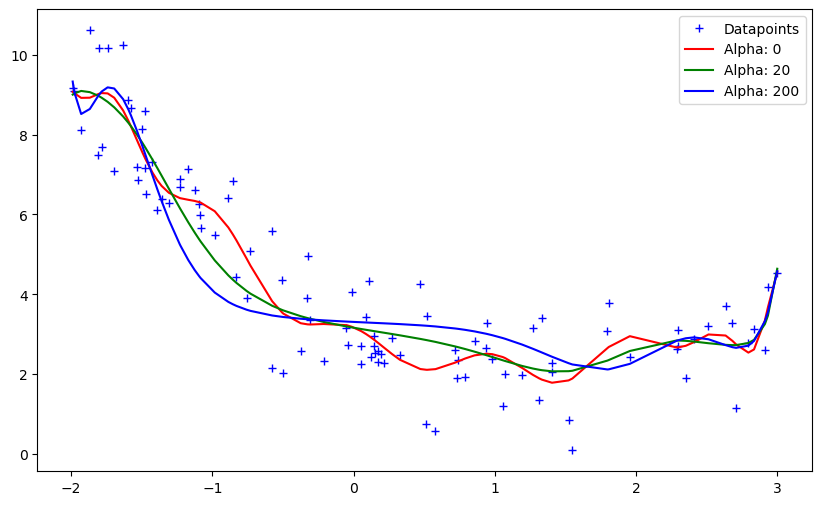

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()